In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [6]:
car=pd.read_csv('2nd Hand Car Data.csv')

In [11]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
car.shape



(301, 9)

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### Creating backup copy

In [14]:
backup=car.copy()

#### Checking Unique values per column

In [15]:
car.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

#### checking non-null values

In [16]:
car.isna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


#### checking datatypes of each column

In [17]:
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

#### sum of non-null value in each column

In [18]:
car.notnull().sum()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Driven_kms       301
Fuel_Type        301
Selling_type     301
Transmission     301
Owner            301
dtype: int64

In [19]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Checking relationship of Company with Price

In [20]:
car['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [21]:
car['Car_Name']=car['Car_Name'].str.split().str.slice(start=0,stop=2).str.join(' ')

In [22]:
car['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield', 'UM Renegade',
       'KTM RC200', 'Bajaj Dominar', 'KTM RC390', 'Hyosung GT250R',
       'KTM 390', 'Mahindra Mojo', 'Bajaj Pulsar', 'Bajaj Avenger',
       'Honda CB', 'Yamaha FZ', 'TVS Apache', 'Honda CBR', 'Hero Extreme',
       'Hero Passion', 'Yamaha Fazer', 'Honda Activa', 'TVS Sport',
       'Honda Dream', 'Hero Splender', 'Activa 3g', 'Activa 4g',
       'Hero Honda', 'Honda Karizma', 'TVS Jupyter', 'Bajaj Discover',
       'Suzuki Access', 'TVS Wego', 'Hero Glamour', 'Hero Super',
       'Hero Hunk', 'Hero Ignitor', 'Hero CBZ', 'Bajaj ct', 'i20',
       'grand i10', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna',
       'city', 'brio', 'amaze', 'jazz'

In [23]:
car.nunique()

Car_Name          72
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

C:\Users\mohanesh.barge\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mohanesh.barge\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mohanesh.barge\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mohanesh.barge\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mohanesh.barge\Anaconda3\lib\site-packages\seaborn\categori

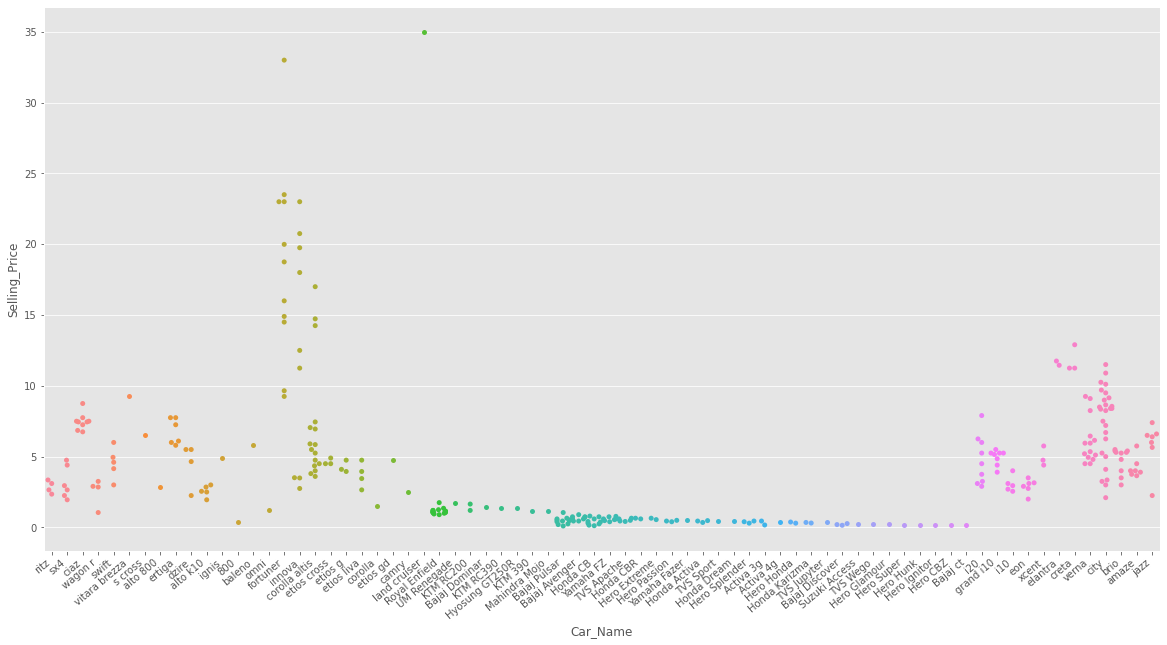

In [24]:
mpl.style.use('ggplot')
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Car_Name',y='Selling_Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Selling_ Price

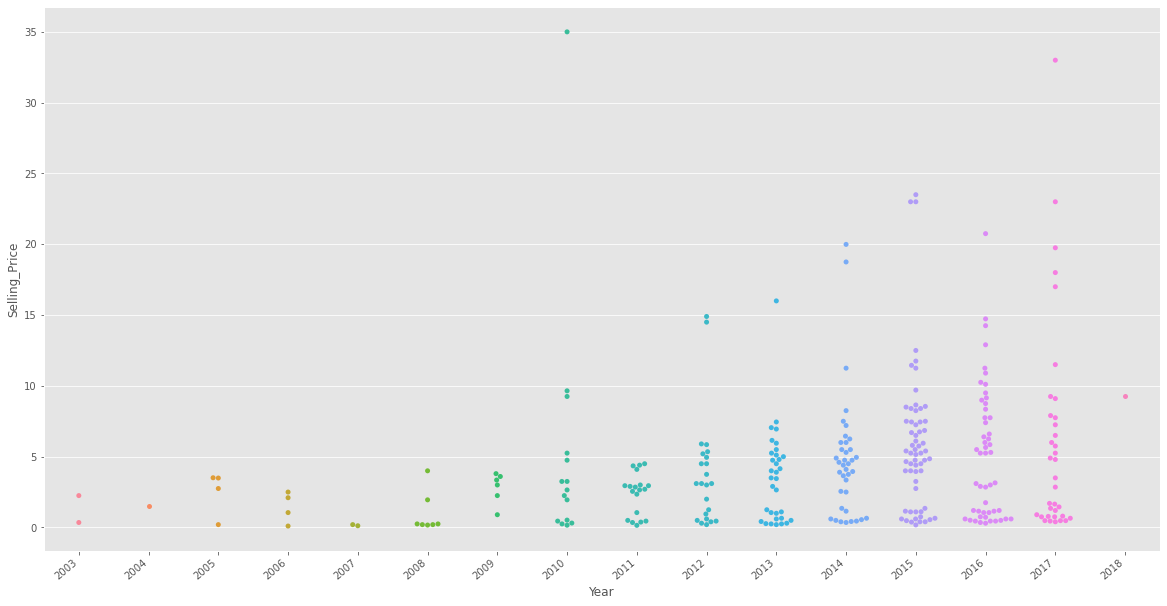

In [25]:
mpl.style.use('ggplot')
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Selling_Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Driven_Km with Selling Price

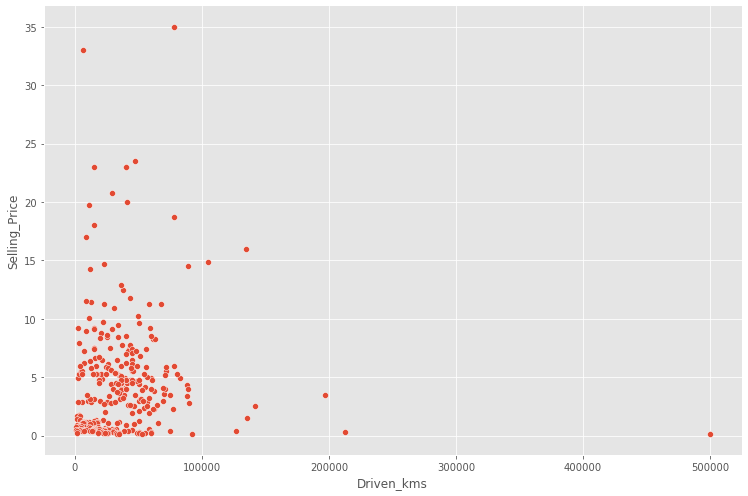

In [26]:
sns.relplot(x='Driven_kms',y='Selling_Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

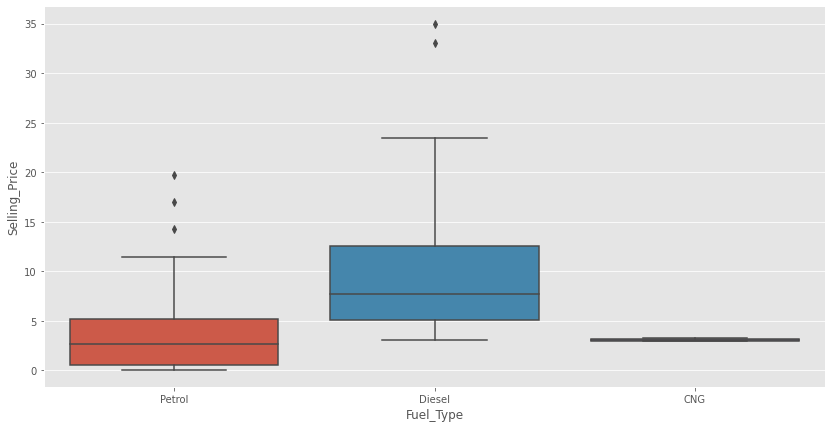

In [27]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=car)

### Relationship of Selling_Price with FuelType, Year and Driven_kms mixed

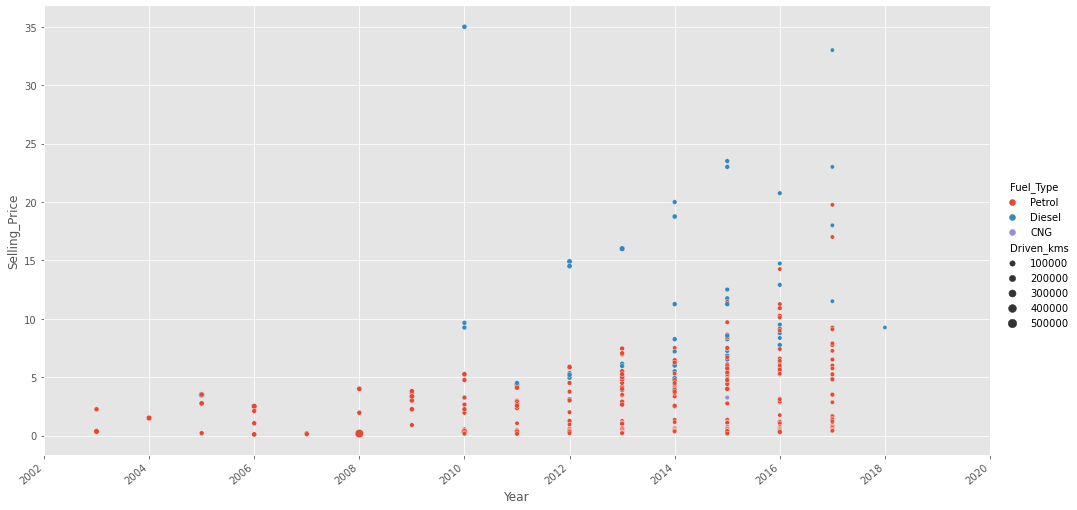

In [28]:
ax=sns.relplot(x='Year',y='Selling_Price',data=car,hue='Fuel_Type',size='Driven_kms',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data, will drop Selling_Type column since it hardly impact selling price.

In [29]:

X = car[['Car_Name', 'Present_Price', 'Year', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner']]

y=car['Selling_Price']
       

In [34]:
X

,Car_Name,Present_Price,Year,Driven_kms,Fuel_Type,Transmission,Owner
0,ritz,5.59,2014,27000,Petrol,Manual,0
1,sx4,9.54,2013,43000,Diesel,Manual,0
2,ciaz,9.85,2017,6900,Petrol,Manual,0
3,wagon r,4.15,2011,5200,Petrol,Manual,0
4,swift,6.87,2014,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
296,city,11.60,2016,33988,Diesel,Manual,0
297,brio,5.90,2015,60000,Petrol,Manual,0
298,city,11.00,2009,87934,Petrol,Manual,0
299,city,12.50,2017,9000,Diesel,Manual,0


In [30]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [31]:
y.shape

(301,)

### Applying Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [35]:
ohe=OneHotEncoder()
ohe.fit(X[['Car_Name','Fuel_Type', 'Transmission']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [36]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Car_Name','Fuel_Type', 'Transmission']),
                                    remainder='passthrough')

#### Linear Regression Model

In [37]:
lr=LinearRegression()

#### Making a pipeline

In [38]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [39]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj Avenger', 'Bajaj Discover',
       'Bajaj Dominar', 'Bajaj Pulsar', 'Bajaj ct', 'Hero CBZ',
       'Hero Extreme', 'Hero Glamour', 'Hero Honda', 'Hero Hunk',
       'Hero Ignitor', 'Hero Passion', 'Hero Splender', 'Hero...
       'etios cross', 'etios g', 'etios gd', 'etios liva', 'fortuner',
       'grand i10', 'i10', 'i20', 'ignis', 'innova', 'jazz',
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 

In [40]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [41]:
r2_score(y_test,y_pred)

0.7836658651925149

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.97 as r2_score

In [54]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [55]:
np.argmax(scores)

650

In [56]:
scores[np.argmax(scores)]

0.9759251518152231

In [57]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['swift', '6.87', '2014', '42450', 'Diesel', 'Manual', '0']).reshape(1,7)))

array([5.1361599])

#### The best model is found at a certain random state 

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9759251518152231

In [52]:
import pickle

In [53]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [54]:
pipe.predict(pd.DataFrame(columns=['Car_Name', 'Present_Price', 'Year', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner'],data=np.array(['swift', '6.87', '2014', '42450', 'Diesel', 'Manual', '0']).reshape(1,7)))

array([5.37305771])